### Notebook 3_2

## Second Order System — Underdamped System Characteristics

#### Student Learning Outcomes
* Learn the period of damping and log decrement on impulse response.
* Learn the steady state value, peak time and percentage overshoot on step response.
* Learn the Q factor and how to read from bode and impulse response.
--------------------

In [1]:
# import at first
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Task 1: Impulse Characteristics</h2>
</div>


From the Conclusion 3 from the last Notebook, we have:

An underdamped system, $H(s) = \dfrac{\omega_n^2}{s^2+2\zeta\omega_n s+\omega_n^2},  (0<\zeta<1)$

Its unit impulse response is 
$$y(t) = \frac{\omega_n}{\sqrt{1-\zeta^2}}e^{-\zeta\omega_n t}\sin\bigl(\omega_n\sqrt{1-\zeta^2}t\bigr)$$

------------
Mathmatically, two characteristics in the response are constant

**1. Constant Period of Damping:**

 The sine term determines the oscillation frequency.
 
 The freq is $\omega_n \sqrt{1-\zeta^2}$ rad/s.
 
 So the **Period of Damping** is $T_d = \boxed{\frac{2\pi}{\omega_n\sqrt{1-\zeta^2}}}$ seconds


**2. Constant Logarithmic Decrement Between Successive Peaks:**

 The exponential term detemines the decay of the peaks. 
 
 For 2 successive peaks located at $t_1$ and $t_2$:
 
 $\mathrm{Decrement} = \frac{Amplitude_1}{Amlitude_2} = \frac{\frac{\omega_n}{\sqrt{1-\zeta^2}}e^{-\zeta\omega_n t_1}\sin(2\pi)}{\frac{\omega_n}{\sqrt{1-\zeta^2}}e^{-\zeta\omega_n t_2}\sin(2\pi)} =e^{-\zeta\omega_n (t_1-t_2)}=e^{\zeta\omega_n T_d}$
 
 So the **Logarithmic Decrement** is $\ln(e^{\zeta\omega_n T_d}) = \boxed{\zeta\omega_n T_d = \frac{2\pi\zeta}{\sqrt{1-\zeta^2}}}$

 https://en.wikipedia.org/wiki/Logarithmic_decrement

----------
Let's verify it with an example.

$$H(s) = \frac{100}{s^2+0.5s+3}$$

* Calculation in Python

Firstly, calculate $\zeta$ and $\omega_n$ using Python, in the next code cell.

Then Based on the boxed theorem (theo) above, calculate the Period of Damping and Logarithmic Decrement.

In [2]:
# calculate in Python
w_n = np.sqrt(3)
zeta = 0.5/2/w_n

print(f"Natural frequency (w_n): {w_n:.3f}")
print(f"Damping ratio (zeta): {zeta:.3f}")

# theoretical results
T_d_theo = 2*np.pi/w_n/np.sqrt(1-zeta*zeta)
Log_Decrement_theo = 2*np.pi*zeta/np.sqrt(1-zeta*zeta)

print(f"Period of Damping: {T_d_theo:.3f} seconds")
print(f"Logarithmic Decrement: {Log_Decrement_theo:.3f}")

Natural frequency (w_n): 1.732
Damping ratio (zeta): 0.144
Period of Damping: 3.666 seconds
Logarithmic Decrement: 0.916


<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Python Printout: 1 pt</strong>
</span>

* Next, run this code directly. It will plot the impulse response of the previous system.

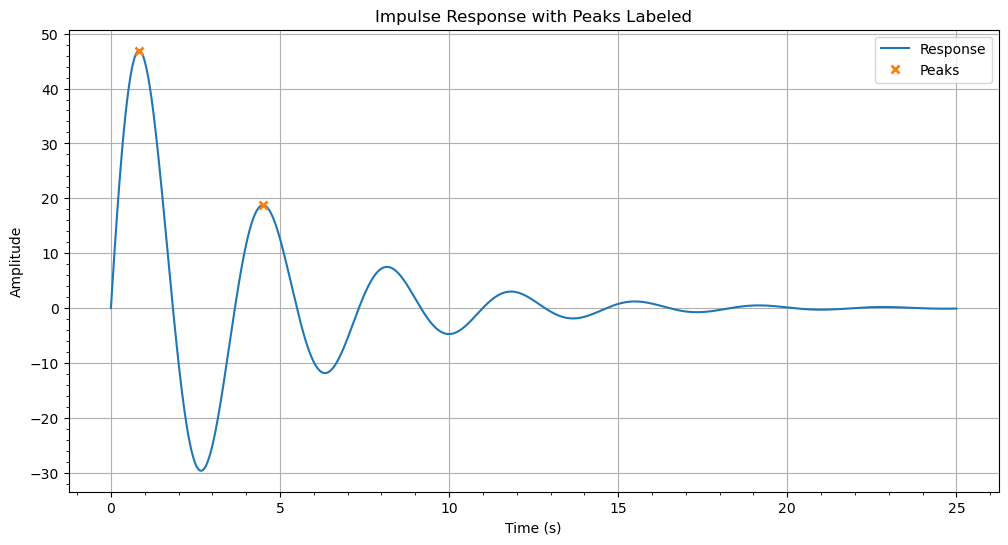

In [3]:
# Run this code
# Code is already completed
H_1 = sig.lti([100], [1, 0.5, 3])
t_1 = np.linspace(0, 25, 1000)
_, y_1 = sig.impulse(H_1, T=t_1)

# Find peaks
peaks, _ = sig.find_peaks(y_1)
first_2_peaks = peaks[:2]
peak_times = t_1[first_2_peaks]

# Plot 
plt.figure(figsize=(12, 6))
plt.plot(t_1, y_1, label='Response')
plt.plot(peak_times, y_1[first_2_peaks], 'x', markeredgewidth=2, label='Peaks')
plt.title('Impulse Response with Peaks Labeled')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.minorticks_on()
plt.show()

* Now, observe the graph, finish Python code to printout. Do you get similar results as previous theoretical calculation?


In [4]:
## Obverse 2 peaks marked in orange
## Roughly read their Time and Amplitude

peak1_amp = 47
peak1_time = 1

peak2_amp = 19
peak2_time = 4.5

# Calculate the Period of Damping based on observation (obsv)
T_d_obsv = 4.5 - 1

# Calculate the Logarithmic Decrement based on observation (obsv)
Log_Decrement_obsv = np.log(47 / 19)

print(f"Period of Damping from observation: {T_d_obsv:.3f} seconds")
print(f"Logarithmic Decrement from observation: {Log_Decrement_obsv :.3f}")

Period of Damping from observation: 3.500 seconds
Logarithmic Decrement from observation: 0.906


<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Python Printout: 1 pt</strong>
</span>

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Task 2: Step Characteristics</h2>
</div>


For second order underdamped system, its step response is chcteristczed by the following terminology:

* **Steady State Value**: for a unit step response, the steady state value is just the DC Gain

$$\boxed{H(s=0)}$$

* **Peak Time**: is the time taken for the response to rise from 0 to the **first peak**

$$\boxed{t_p = \dfrac{\pi}{\omega_n\sqrt{1-\zeta^2}}}$$

* **Percentage Overshoot (PO)**: is **first peak** value minus the steady-state value divided by the steady-state value

$$PO = \dfrac{(Amplitude_{peak}-Amplitude_{steady})}{Amplitude_{steady}} = \boxed{e^{-\frac{\zeta \pi}{\sqrt{1-\zeta^2}}}\times 100\%}$$

https://en.wikipedia.org/wiki/Overshoot_(signal)

----------
Let's verify it with the same example from Task 1.

$$H(s) = \frac{100}{s^2+0.5s+3}$$

Your job is to calculate the Peak Time and Percentage Overshoot in Python.

In [5]:
# re-use w_n and zeta from Task 1
print(f"Natural frequency (w_n): {w_n:.3f}")
print(f"Damping ratio (zeta): {zeta:.3f}")

# theoretical results
Hs_0_theo = 100/3
t_p_theo = np.pi/w_n/np.sqrt(1-zeta**2)
PO_theo =np.exp(-zeta*np.pi/np.sqrt(1-zeta**2))

print(f"Steady State Value: {Hs_0_theo:.3f}")
print(f"Peak Time: {t_p_theo:.3f} seconds")
# note Percentage Overshoot should be in percentage form
print(f"Percentage Overshoot: {PO_theo* 100:.3f}%")

Natural frequency (w_n): 1.732
Damping ratio (zeta): 0.144
Steady State Value: 33.333
Peak Time: 1.833 seconds
Percentage Overshoot: 63.239%


<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Python Printout: 1 pt</strong>
</span>

* Next, run this code directly. It will plot the step response of the previous system.

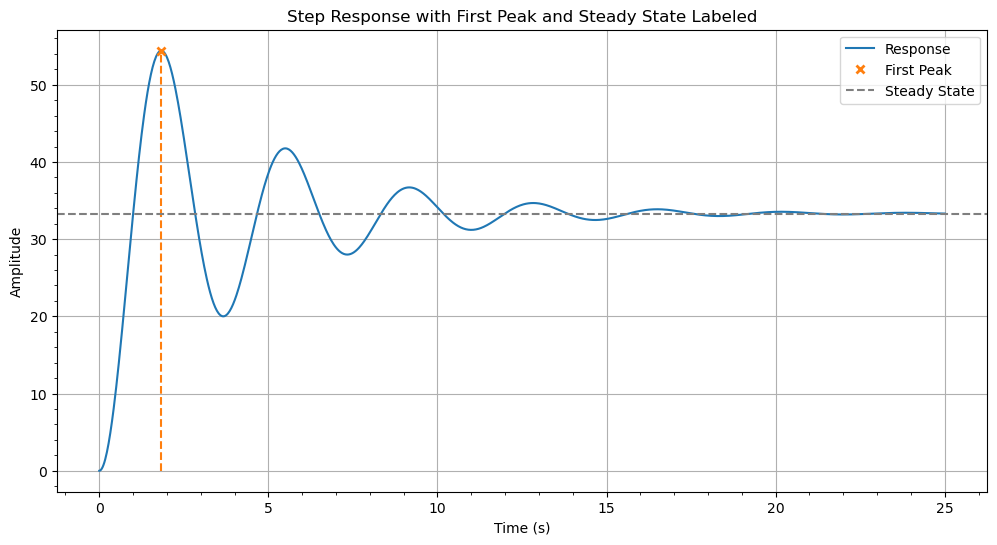

In [6]:
# Run this code
# Code is already completed
H_1 = sig.lti([100], [1, 0.5, 3])
t_2 = np.linspace(0, 25, 1000)
_, y_2 = sig.step(H_1, T=t_2)

steady_state_value = y_2[-1]
peaks2, _ = sig.find_peaks(y_2)
first_peak_index = peaks2[0]
first_peak_time = t_2[first_peak_index]
first_peak_value = y_2[first_peak_index]
# Plot 
plt.figure(figsize=(12, 6))
plt.plot(t_2, y_2, label='Response')
plt.plot(first_peak_time, first_peak_value, 'x', markeredgewidth=2, label='First Peak')
plt.vlines(first_peak_time, 0, first_peak_value, color='tab:orange', linestyle='--')
plt.axhline(steady_state_value, color='tab:grey', linestyle='--', label='Steady State')
plt.title('Step Response with First Peak and Steady State Labeled')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.minorticks_on()
plt.show()

* Now, observe the graph, finish Python code to printout. Do you get similar results as previous theoretical calculation?


In [7]:
## Obverse (obsv) and Read the graph
# The Amplitude of the first peak
first_peak_amp_obsv = 56
# The Time of the first peak
first_peak_time_obsv = 1.8
# The Amplitude of the steady state
steady_state_amp_obsv = 33.7

# Calculate the Percentage Overshoot based on observation (obsv)
PO_obsv = (56 - 33.7) / 33.7

print(f"Steady State Value: {steady_state_amp_obsv:.3f}")
print(f"Peak Time: {first_peak_time_obsv:.3f} seconds")
# note Percentage Overshoot should be in percentage form
print(f"Percentage Overshoot: {PO_obsv* 100:.3f}%")

Steady State Value: 33.700
Peak Time: 1.800 seconds
Percentage Overshoot: 66.172%


<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Python Printout: 1 pt</strong>
</span>

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Task 3: Q Factor</h2>
</div>


**Q Factor (Quality Factor)** is a characteristic to describe underdamped systems.

https://en.wikipedia.org/wiki/Q_factor

Formally, it can be defined as $$Q = \dfrac{1}{2\zeta}$$

While the relationship between Q factor and $\zeta$ is simple, in practice, it's often easier to determine the Q factor directly from a graph.

----------
**1. Read Q factor from Bode**

Q factor can be estimated over the Bode Mag Plot using the –3 dB drop method.
$$Q \approx \frac{f_{\text{peak}}}{\Delta f}$$

* $f_{\text{peak}}$ is the frequency at which the Magnitude is maximum (**resonant peak**)
* $\Delta f$ the bandwidth between the upper and lower freqs at which the Magnitude is 3 dB below the resonant peak

-------------
Let's explain with the previous example transfer function:

$$H(s) = \frac{100}{s^2+0.5s+3}$$

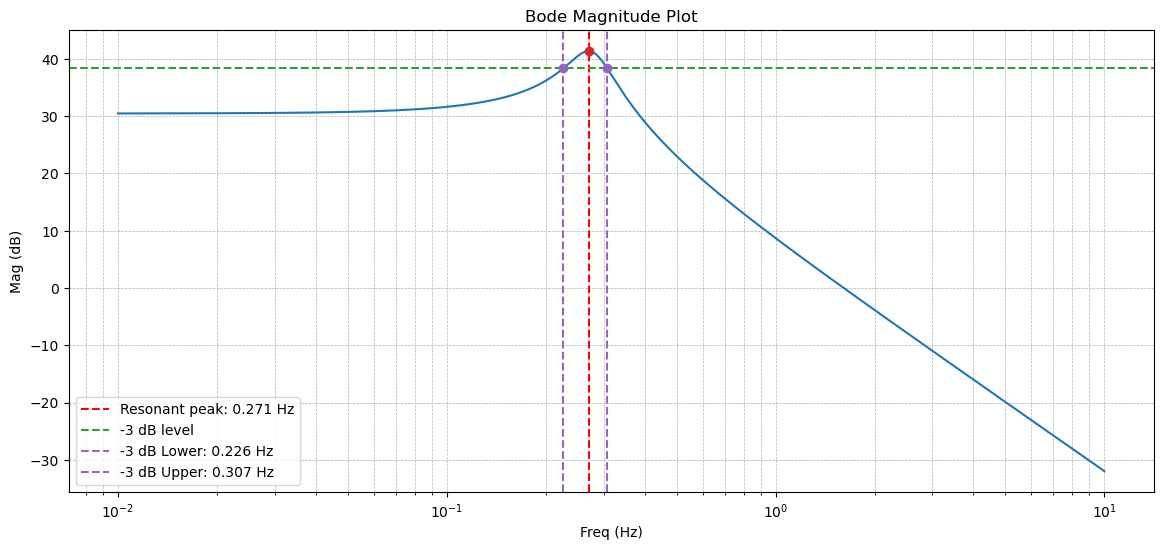

In [8]:
H_1 = sig.lti([100], [1, 0.5, 3])
f = np.logspace(-2, 1, 1000)
w = 2*np.pi*f
_, mag, _ = sig.bode(H_1, w=w)

peak_idx = np.argmax(mag)
f_peak, mag_peak = f[peak_idx], mag[peak_idx]
target_mag = mag_peak - 3
diff = mag - target_mag
crossings = [f[i] - diff[i]*(f[i+1]-f[i])/(diff[i+1]-diff[i])
             for i in range(len(diff)-1) if diff[i]*diff[i+1] < 0]
f_low = max((fc for fc in crossings if fc < f_peak), default=None)
f_high = min((fc for fc in crossings if fc > f_peak), default=None)

plt.figure(figsize=(14, 6))
plt.semilogx(f, mag)
plt.xlabel('Freq (Hz)')
plt.ylabel('Mag (dB)')
plt.title('Bode Magnitude Plot')

# Annotate resonant peak and -3dB points
plt.axvline(f_peak, color='red', linestyle='--', label=f'Resonant peak: {f_peak:.3f} Hz')
plt.plot(f_peak, mag_peak, marker='o', linestyle='', color='tab:red')
plt.axhline(target_mag, color='tab:green', linestyle='--', label='-3 dB level')
plt.axvline(f_low, color='tab:purple', linestyle='--', label=f'-3 dB Lower: {f_low:.3f} Hz')
plt.plot(f_low, target_mag, marker='o', linestyle='', color='tab:purple')
plt.axvline(f_high, color='tab:purple', linestyle='--', label=f'-3 dB Upper: {f_high:.3f} Hz')
plt.plot(f_high, target_mag, marker='o', linestyle='', color='tab:purple')

plt.legend()
plt.grid(which='both', linestyle='--', linewidth=0.5)

* Observe the graph, finish Python code to printout. Do you get similar result from theorem and from Bode reading?

In [9]:
# re-use w_n and zeta from Task 1
print(f"Natural frequency (w_n): {w_n:.3f}")
print(f"Damping ratio (zeta): {zeta:.3f}")

# Calculate Q factor based on theoretical equation
Q_theo = 1/2/zeta
print(f"Q factor from theorem: {Q_theo:.3f}")

# Read the resonant peak freq from graph
f_peak = 0.271
# Read the upper and lower freqs at which the Magnitude is 3 dB below the resonant peak
f_lower = 0.226
f_upper = 0.307
# Calculate the Q factor based on Bode reading
Q_from_bode = 0.271 / (0.307 - 0.226)
print(f"Q factor from Bode Plot: {Q_from_bode:.3f}")

Natural frequency (w_n): 1.732
Damping ratio (zeta): 0.144
Q factor from theorem: 3.464
Q factor from Bode Plot: 3.346


<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Python Printout: 0.5 pt</strong>
</span>

----------
**2. Read Q factor from Impulse Response**

For an underdamped system with multiple oscillations in its unit impulse response, you can directly estimate the Q factor by counting how many oscillations before it decays to 5\%.

Note, this estimation is only applicable when there are multiple clear oscillations.

For example, for the previous transfer function 

$$H(s) = \frac{100}{s^2+0.5s+3}$$ 

you can roughly see 4 ~ 4.5 oscillations before decaying to 5\%. So you can rought estimate the Q factor is 4~4.5.

----------
Or we can check a more clear example with a new transfer function: 

$$H(s) = \frac{100}{s^2+0.2s+3}$$

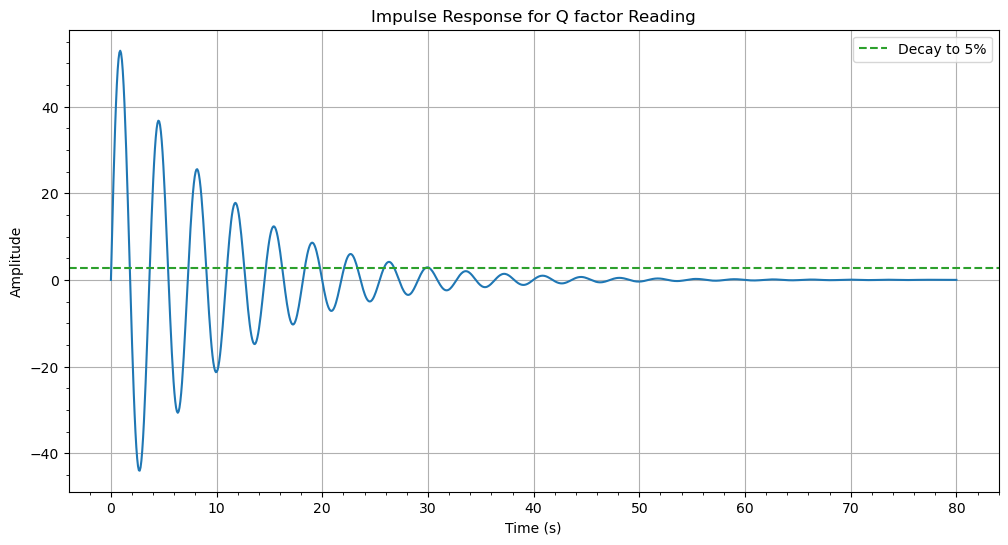

In [10]:
# Run this code
# Code is already completed
H_new = sig.lti([100], [1, 0.2, 3])
t_new = np.linspace(0, 80, 1000)
_, y_new = sig.impulse(H_new, T=t_new)

peaks_new, _ = sig.find_peaks(y_new)
first_peak_index_new = peaks_new[0]
first_peak_value_new = y_new[first_peak_index_new]
# Plot 
plt.figure(figsize=(12, 6))
plt.plot(t_new, y_new)
plt.axhline(first_peak_value_new*0.05, color='tab:green', linestyle='--', label='Decay to 5%')
plt.title('Impulse Response for Q factor Reading')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.minorticks_on()
plt.show()

* Observe the graph, finish Python code to printout. Do you get similar result from theorem and from Impulse Oscillation reading?

In [11]:
## The transfer function is 100/(s^2+0.2s+3)

# calculate w_n
w_n_new = np.sqrt(3)
# calculate zeta
zeta_new = 0.2/2/w_n_new
# calculate Q factor from theorem
Q_theo_new = 1/2/zeta_new

print(f"Q factor from theorem: {Q_theo_new:.3f}")

# Observe the graph
# Count how many oscillation before it decays to 5%
Q_obsv_new = 8
print(f"Q factor from observing impulse response: {Q_obsv_new:.3f}")

Q factor from theorem: 8.660
Q factor from observing impulse response: 8.000


<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Python Printout: 0.5 pt</strong>
</span>

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Submit in .pdf</h2>
</div>


